# Operators for `EnsembleTS`

In [2]:
%load_ext autoreload
%autoreload 2

import pens
import numpy as np

## Load test data

In [3]:
# the data can be downloaded from:
# https://atmos.washington.edu/%7Ehakim/lmr/LMRv2/gmt_MCruns_ensemble_full_LMRv2.1.nc
path = './data/gmt_MCruns_ensemble_full_LMRv2.1.nc'
ens_LMR = pens.EnsembleTS().load_nc(path, var='gmt')

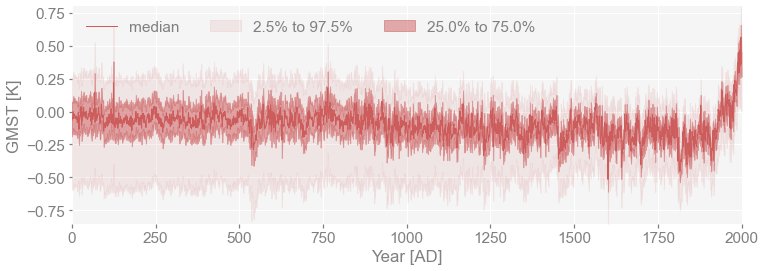

In [3]:
ens_LMR.time_name = 'Year'
ens_LMR.time_unit = 'AD'
ens_LMR.value_name = 'GMST'
ens_LMR.value_unit = 'K'
fig, ax = ens_LMR.plot_qs()

## Add/substract a constant

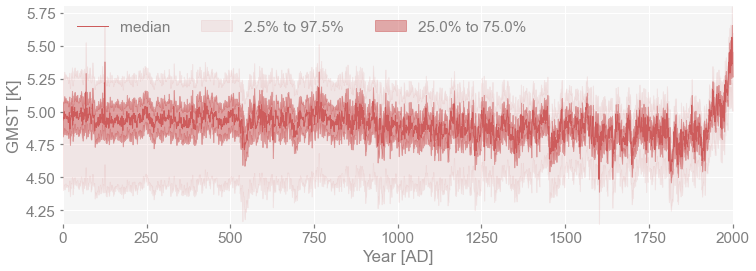

In [4]:
altered_ens = ens_LMR + 5
fig, ax = altered_ens.plot_qs()

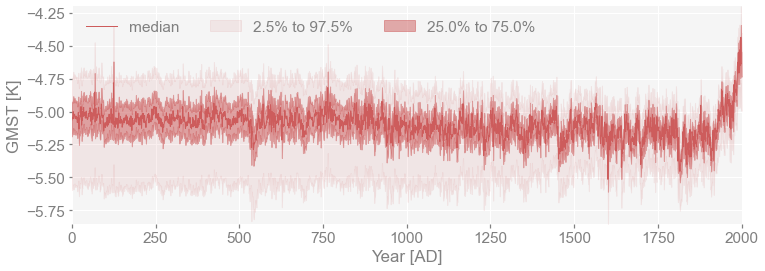

In [5]:
altered_ens = ens_LMR - 5
fig, ax = altered_ens.plot_qs()

## Add/substract an array

In [6]:
type(ens_LMR.mean)

numpy.ndarray

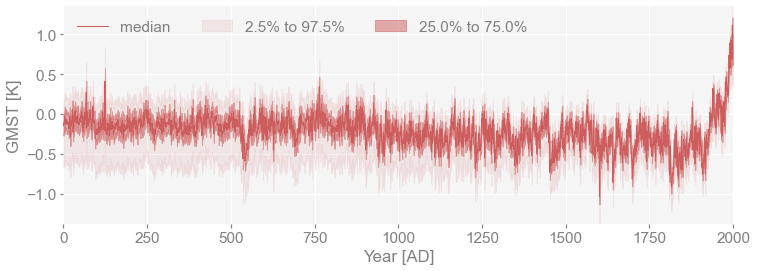

In [7]:
altered_ens = ens_LMR + ens_LMR.mean
fig, ax = altered_ens.plot_qs()

[-0.08287018 -0.06807825 -0.07386936 ...  0.5512058   0.35492706
  0.34797347]
[ 7.1525574e-10  3.3378602e-09  2.1457671e-09 ...  3.2424929e-08
 -1.2755394e-08  1.4305114e-08]


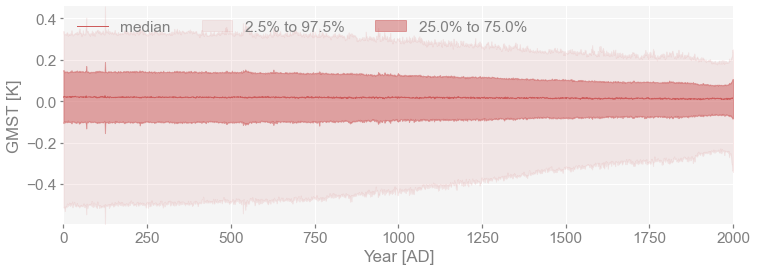

In [8]:
altered_ens = ens_LMR - ens_LMR.mean
fig, ax = altered_ens.plot_qs()
print(ens_LMR.mean)
print(altered_ens.mean)

## Add/substract another `EnsembleTS`

In [9]:
type(ens_LMR.get_mean())

pens.ens.EnsembleTS

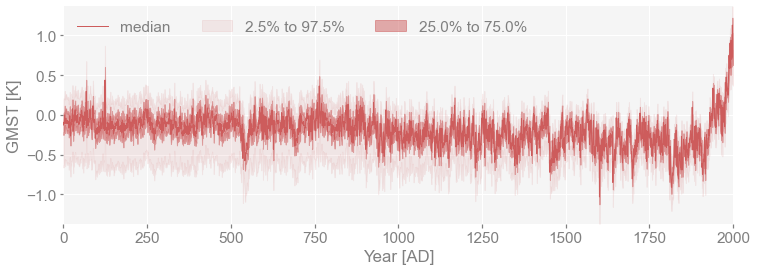

In [10]:
altered_ens = ens_LMR + ens_LMR.get_mean()
fig, ax = altered_ens.plot_qs()

[-0.08287018 -0.06807825 -0.07386936 ...  0.5512058   0.35492706
  0.34797347]
[-0.01971332 -0.02195314 -0.02144178 ... -0.0135707  -0.0164917
 -0.01582639]


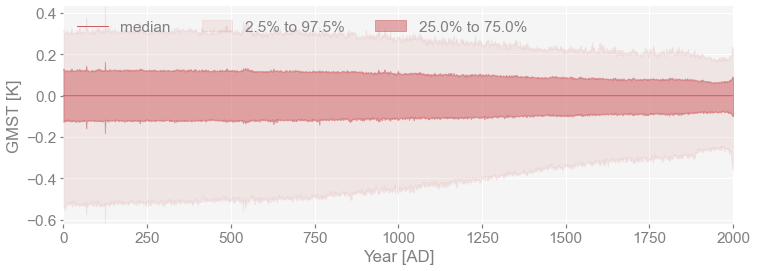

In [11]:
altered_ens = ens_LMR - ens_LMR.get_mean()
fig, ax = altered_ens.plot_qs()
print(ens_LMR.mean)
print(altered_ens.mean)

## Multiply/divide a constant

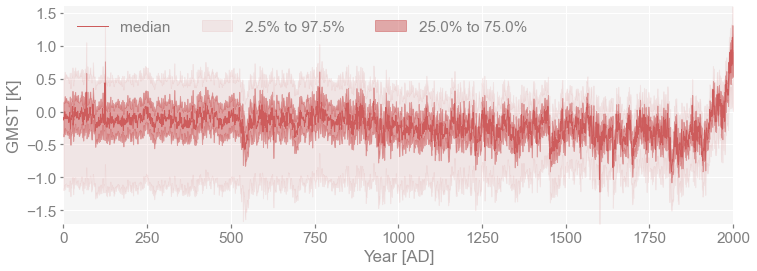

In [12]:
altered_ens = ens_LMR * 2
fig, ax = altered_ens.plot_qs()

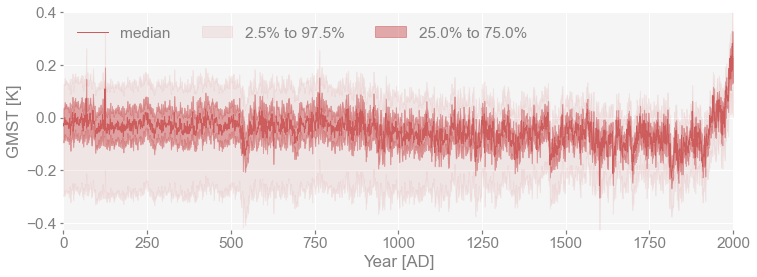

In [13]:
altered_ens = ens_LMR / 2
fig, ax = altered_ens.plot_qs()

## Multiply/divide an array

In [14]:
type(ens_LMR.std)

numpy.ndarray

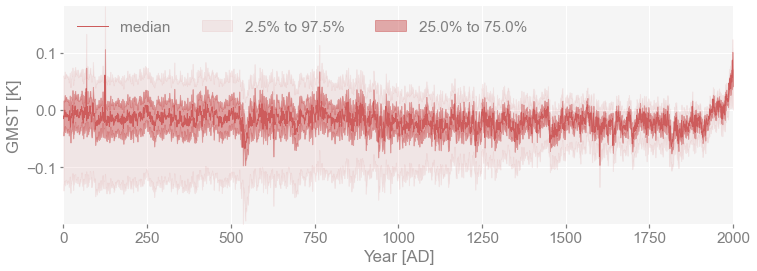

In [15]:
altered_ens = ens_LMR * ens_LMR.std
fig, ax = altered_ens.plot_qs()

[0.23555423 0.22300425 0.22238298 ... 0.15474878 0.15342283 0.1571489 ]
[1.         1.         1.         ... 1.         0.99999994 1.        ]


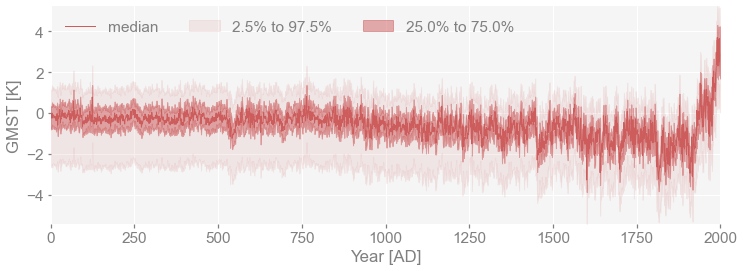

In [16]:
altered_ens = ens_LMR / ens_LMR.std
fig, ax = altered_ens.plot_qs()
print(ens_LMR.std)
print(altered_ens.std)

## Multiply/divide another `EnsembleTS`

In [17]:
type(ens_LMR.get_std())

pens.ens.EnsembleTS

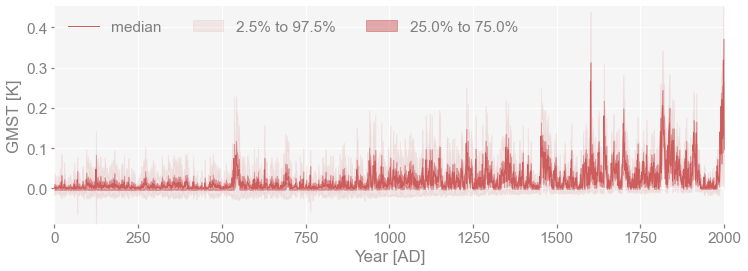

In [18]:
altered_ens = ens_LMR * ens_LMR.get_std()
fig, ax = altered_ens.plot_qs()

[0.23555423 0.22300425 0.22238298 ... 0.15474878 0.15342283 0.1571489 ]
[3.72967    4.8347692  4.2417173  ... 0.27400002 0.41307238 0.43196526]


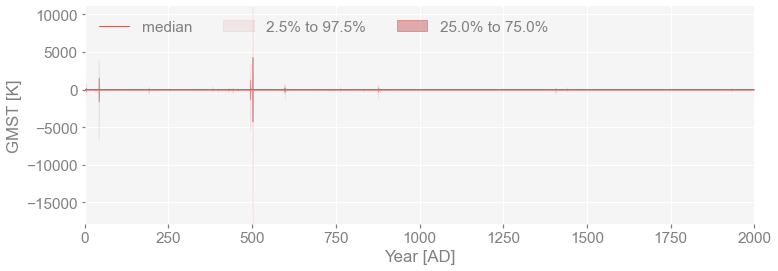

In [19]:
altered_ens = ens_LMR / ens_LMR.get_std()
fig, ax = altered_ens.plot_qs()
print(ens_LMR.std)
print(altered_ens.std)

## Standardization

[ 0.0000000e+00  7.6293949e-09  4.7683715e-09 ...  1.9836426e-07
 -8.8691714e-08  8.3923339e-08]
[1.         1.         1.         ... 1.         0.99999994 1.        ]


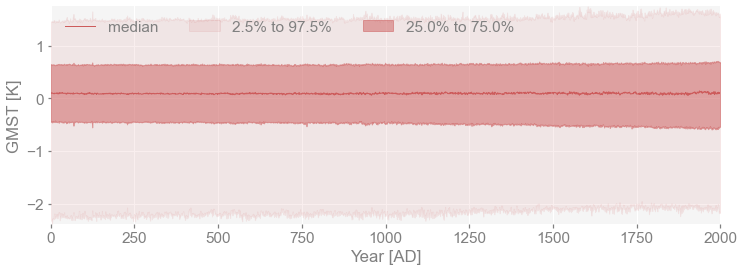

In [20]:
altered_ens = (ens_LMR - ens_LMR.mean) / ens_LMR.std
fig, ax = altered_ens.plot_qs()
print(altered_ens.mean)
print(altered_ens.std)

In [21]:
print(ens_LMR.get_std().time_name)
print(ens_LMR.get_std().time_unit)
print(ens_LMR.get_mean().value_name)
print(ens_LMR.get_median().value_unit)

Year
AD
GMST
K


## Convert to a Pyleoclim `Series` object

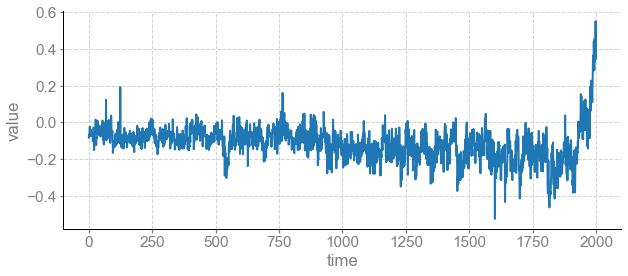

In [12]:
ts = ens_LMR.get_mean().to_pyleo()
fig, ax = ts.plot()